隨機變數共變  
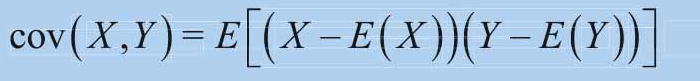  
但若XY同時增大,會令共變異也增大,故引入相關係數(即標準化後共變異)  
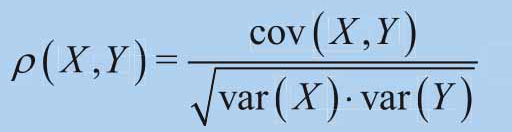  
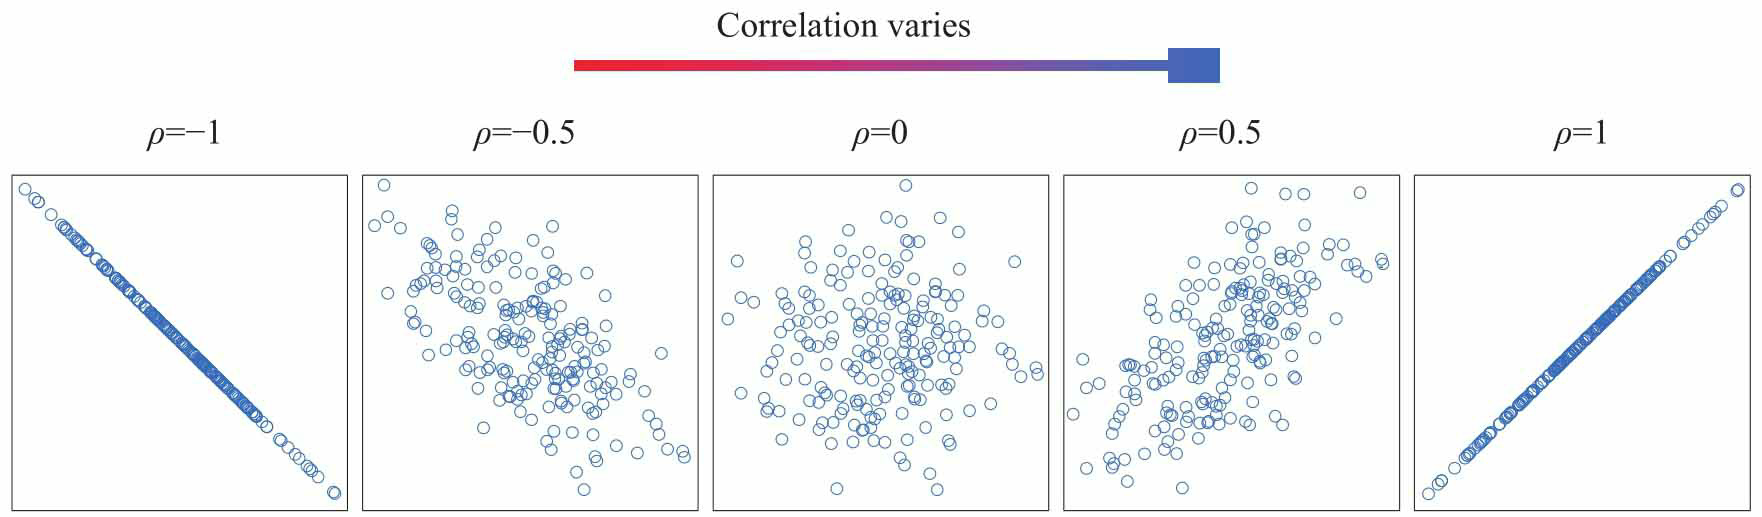



In [3]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

stocks = ['FB', 'NFLX', 'AMZN', 'GLD', 'GE', 'NKE', 'FORD']
df = data.DataReader(stocks, 'yahoo', '2019-1-1', '2019-12-31')['Adj Close']
dflog = np.log(df)
stockreturn= dflog.pct_change()
stockreturn = stockreturn[1:]

# covariance and correlation
stockcov = stockreturn.cov()
stockcorr = stockreturn.corr()
pd.options.display.float_format = '${:,.6f}'.format
print(stockcov)
print(stockcorr)


Symbols         FB       NFLX       AMZN        GLD         GE        NKE  \
Symbols                                                                     
FB       $0.000012  $0.000005  $0.000004 $-0.000001  $0.000005  $0.000003   
NFLX     $0.000005  $0.000014  $0.000004 $-0.000001  $0.000006  $0.000004   
AMZN     $0.000004  $0.000004  $0.000004 $-0.000001  $0.000004  $0.000003   
GLD     $-0.000001 $-0.000001 $-0.000001  $0.000002 $-0.000001 $-0.000001   
GE       $0.000005  $0.000006  $0.000004 $-0.000001  $0.000035  $0.000006   
NKE      $0.000003  $0.000004  $0.000003 $-0.000001  $0.000006  $0.000009   
FORD     $0.000160 $-0.000139 $-0.000122  $0.000033 $-0.000493 $-0.000097   

Symbols       FORD  
Symbols             
FB       $0.000160  
NFLX    $-0.000139  
AMZN    $-0.000122  
GLD      $0.000033  
GE      $-0.000493  
NKE     $-0.000097  
FORD     $1.121226  
Symbols         FB       NFLX       AMZN        GLD         GE        NKE  \
Symbols                                 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'FB'),
  Text(1.5, 0, 'NFLX'),
  Text(2.5, 0, 'AMZN'),
  Text(3.5, 0, 'GLD'),
  Text(4.5, 0, 'GE'),
  Text(5.5, 0, 'NKE'),
  Text(6.5, 0, 'FORD')])

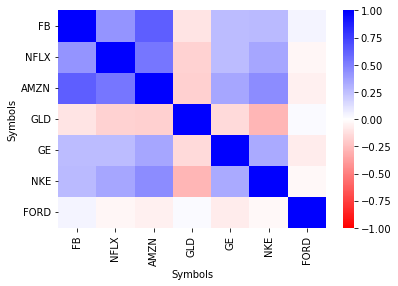

In [4]:
from  matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

cmap=LinearSegmentedColormap.from_list('rb',["r", "w", "b"], N=256) 

sns.heatmap(stockreturn.corr(), cmap=cmap, vmax=1.0, vmin=-1.0)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

抽樣方法確保樣本代表性:  
單隨機  
分層抽樣  
整群:按相似性先分組,再每組抽  
系統:又叫等距,先排序選初始個體,再按等距離抽  
  
Bessel’s correction:n-1自由度補償樣本變異小於母體變異  
  
Sampling Variance:每次抽樣都會有mean,此mean也是隨機變數,有自己的母體與樣本,這些mean的母體變異為Sampling Variance,這些mean的母體標準差稱為Standard Error
例:100個抽樣(各有50元素),即有100個平均值,母體變異即此100個平均值的標準差2次方,平均每個平均值的變異應為100個平均值的標準差2次方/n  
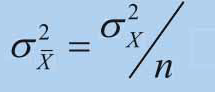  
標準誤為  
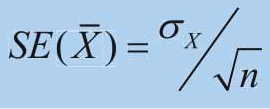  
實務會用樣本標準差代替母體  
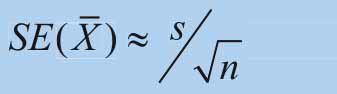  
三大分配  
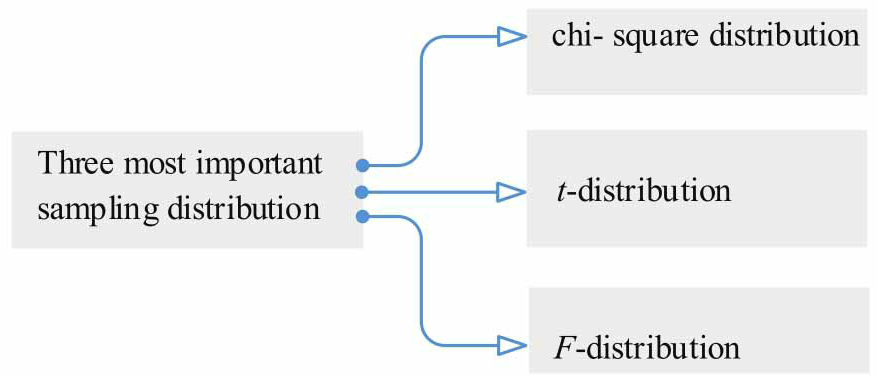  
  
n個互相獨立隨機變數ξ1、ξ2、…、ξ服從標準常態>此n個互相獨立隨機變數平方和產生一隨機變數,服從卡方分配,隨自由度n增大會服從常態  
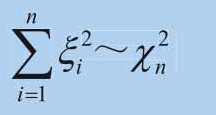  
例:即對於一個母體群抽樣本，每個樣本均會計算一變異,抽樣數小的狀況下其各變異的分配圖為右偏(卡方);當抽樣數n(自由度)提升會趨近常態
https://yashi4sale.pixnet.net/blog/post/45635923



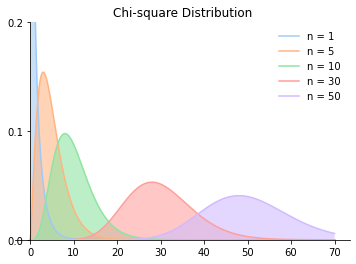

In [5]:
from scipy.stats import chi2 
import numpy as np
import seaborn as sns

listn = [1, 5, 10, 30, 50]
x = np.linspace(0, 70, 500)
sns.set_palette('pastel')

for n in listn: 
    ax = sns.lineplot(x=x, y=chi2.pdf(x, n), label='n = '+str(n))
    ax.fill_between(x, chi2.pdf(x, n), alpha=0.58)

ax.set_title('Chi-square Distribution')
ax.legend(frameon=False)
ax.set_ylim(0.0, 0.2)
ax.set_yticks([0.0, 0.1, 0.2])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')



t distrubition>兩隨機變數X&Y，若X服從標準常態，Y服從卡方，其比率服從自由度為n的t distribution  
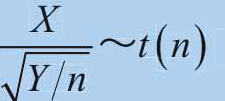  
  
自由度為1的t distrubition為Cauchy distribution  
  
隨自由度上升，t distrubition按近標準常態  

Text(0.5, 0.98, 't Distribution')

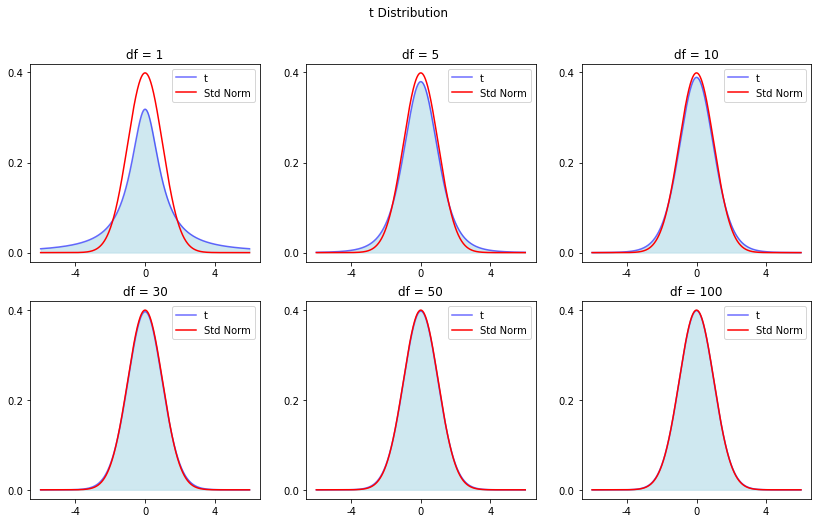

In [1]:
from scipy.stats import t, norm 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

listn = [1, 5, 10, 30, 50, 100]
x = np.linspace(-6, 6, 1000)

rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(14,8))
fign = 0

for i in range(0, rows):
    for j in range(0, cols):
        sns.lineplot(x=x, y=t.pdf(x, listn[fign]), label='t', ax=ax[i, j], color='b', alpha=0.58)
        ax[i, j].fill_between(x, t.pdf(x, listn[fign]), alpha=0.58, color='lightblue')
        sns.lineplot(x=x, y=norm.pdf(x, 0, 1), label='Std Norm', ax=ax[i, j], color='red')
        ax[i, j].set_xticks([-4, 0, 4])
        ax[i, j].set_xticklabels(['-4', '0', '4'])
        ax[i, j].set_yticks([0.0, 0.4, 0.2])
        ax[i, j].set_title(label= "df = " + str(listn[fign]))
        fign+=1

fig.suptitle('t Distribution')


F distrubition>兩隨機變數X&Y，分別服從自由度m與n的卡方，此兩變數除以各自自由度後之比率服從自由度m n的F distribution  
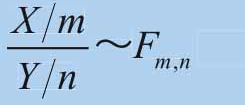


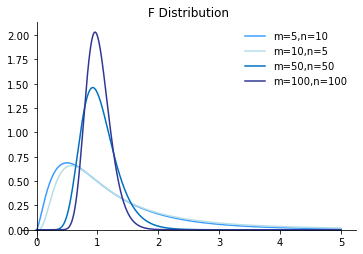

In [3]:
from scipy.stats import f 
import numpy as np
import seaborn as sns

listmn = [[5,10], [10,5], [50, 50], [100, 100]]

customized_palette = ["#3C9DFF","#B7DEE8", "#0070C0","#313695"]
sns.set_palette(customized_palette)

x = np.linspace(0, 5, 1000)
for mn in listmn: 
    ax = sns.lineplot(x=x, y=f.pdf(x, mn[0], mn[1]), label='m='+str(mn[0])+',n='+str(mn[1]))

ax.set_title('F Distribution')
ax.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

大數定律

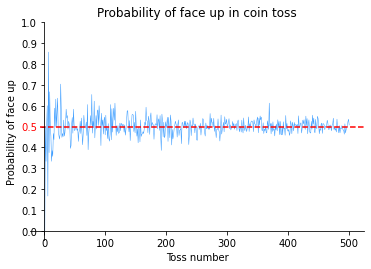

In [4]:
from scipy.stats import bernoulli 
import numpy as np
import matplotlib.pyplot as plt

# maximum toss number
N = 500
# list of trial numbers
trials_total = []
# list of faceup probablity in each trial
prob_faceup = []
for trialnumber in range(1, N+1):
    faceup = 0
    for _ in range(trialnumber):
        if bernoulli.rvs(0.5, size=1) == 1:
            faceup = faceup + 1
    prob_faceup.append(faceup/trialnumber)
    trials_total.append(trialnumber)
# plot
plt.plot(trials_total, prob_faceup, linewidth = 0.5)

plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
# draw y=0.5 red line
plt.axhline(y=0.5, xmin=0.03, xmax=1, color='r', linestyle='--')
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.gca().get_yticklabels()[5].set_color('r')

plt.title('Probability of face up in coin toss')
plt.xlabel('Toss number')
plt.ylabel('Probability of face up')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

中心極限>一定條件下大量獨立隨機變數，無論其本身是何種分配，它們的平均數都會趨於常態  
即在母體中抽樣，只要夠大>每個抽樣有平均>所有平均畫在一起的分配為以母體為中心之常態  
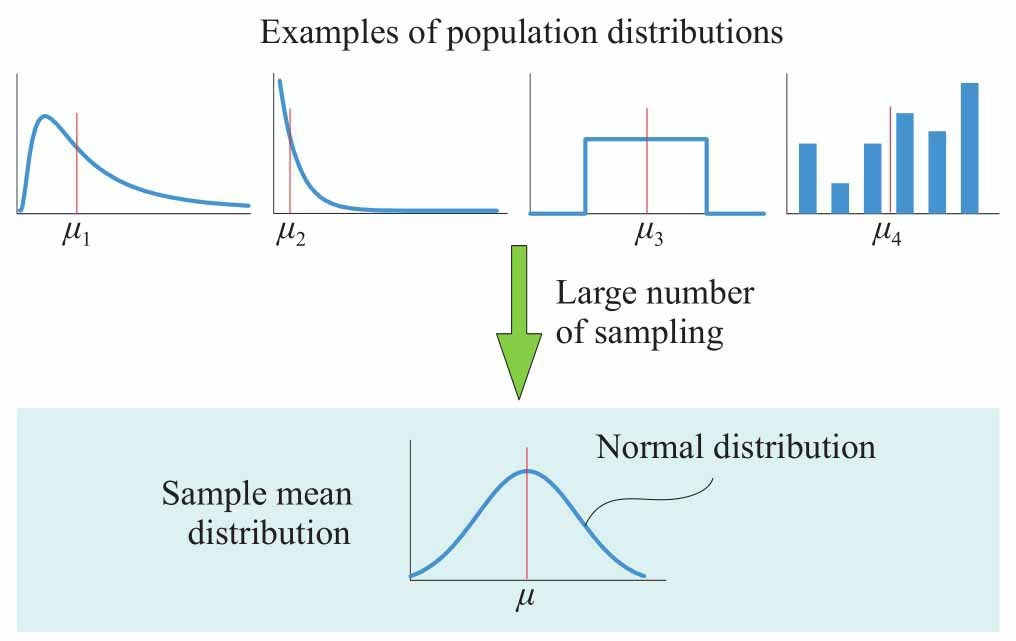

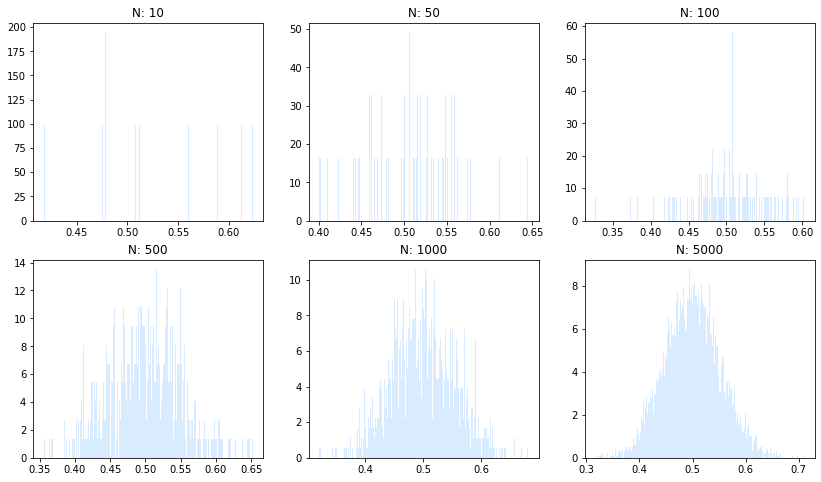

In [5]:
# Central Limit Theorem
import matplotlib.pyplot as plt
import scipy.stats as stats

# sample size
samplesize = 30#樣本中的元素量

# different number of sampling
numofsample = [10,50,100,500,1000,5000]#樣本數
# a list of sample mean
meansample = []

# for each number of sampling (10 to 5000)
for i in numofsample:
    # collect mean of each sample
    eachmeansample = []
    # for each sampling
    for j in range(0,i):
        # sampling 30 sample
        rvs = stats.uniform.rvs(size=samplesize)
        # collect mean of each sample
        eachmeansample.append(sum(rvs)/len(rvs))
    # add mean of each sampling to the list
    meansample.append(eachmeansample)

# draw the graphs
rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(14,8))
n = 0

for i in range(0, rows):
    for j in range(0, cols):
        ax[i, j].hist(meansample[n], bins=200, density=True, alpha=0.2)
        ax[i, j].set_title(label="N: " + str(numofsample[n]))
        n+=1

極大似然>樣本點代入含未知參數模型相乘得likelihood function>再求令此function取值最大的參數  
例:扔硬幣十次的likelihood function  
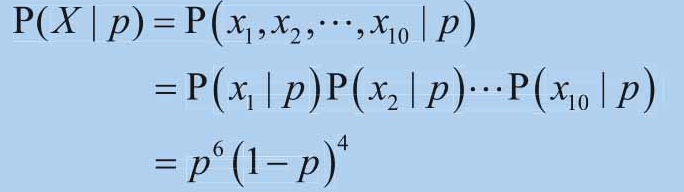  
求出令此function最大化P(即對此function求導並令導數=0>6x^5(1-x)^4-4x^6(1-x)^3=0) 得x=0.6

區間估計計算信任區間

68.0% Confidence Interval: [-0.004,0.005]
95.0% Confidence Interval: [-0.008,0.009]
99.7% Confidence Interval: [-0.012,0.014]


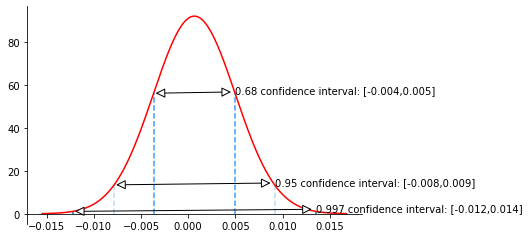

In [1]:
from  pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm 

df = data.DataReader('AAPL', 'yahoo', '2019-1-1', '2019-12-31')['Adj Close']#applestock
# log return
dflog = np.log(df)
stockreturn = dflog.pct_change()
stockreturn = stockreturn[1:]#remove first
# mean and std
mean, sigma = np.mean(stockreturn), np.std(stockreturn, ddof=1)

confidence_level_list = [0.68, 0.95, 0.997]#1.645 1.96 2.33 * sd
customized_palette = ["#3C9DFF","#B7DEE8", "#0070C0"]
i=0
for confidence_level in confidence_level_list:    
    confidence_interval = norm.interval(confidence_level, loc=mean, scale=sigma)#function直接出邊界值
    interval_label = str(confidence_level_list[i])+' confidence interval: ['+str(r'{0:.3f}'.format(confidence_interval[0]))+','+str(r'{0:.3f}'.format(confidence_interval[1]))+']'
    plt.plot((confidence_interval[0], confidence_interval[0]), (0, norm.pdf(confidence_interval[0], loc=mean, scale=sigma)), color=customized_palette[i], linestyle='--')

    plt.plot((confidence_interval[1], confidence_interval[1]), (0, norm.pdf(confidence_interval[1], loc=mean, scale=sigma)), color=customized_palette[i], linestyle='--')
    plt.annotate(interval_label, 
                  xy=(confidence_interval[0], norm.pdf(confidence_interval[1], loc=mean, scale=sigma)), xycoords='data',
                  xytext=(confidence_interval[1], norm.pdf(confidence_interval[1], loc=mean, scale=sigma)), textcoords='data',
                  arrowprops=dict(arrowstyle="<|-|>",
                                  connectionstyle="arc3",
                                  mutation_scale=20,
                                  fc="w")
                    )   

    i+=1

    print(str(confidence_level*100)+"% "+"Confidence Interval: ["+ str(round(confidence_interval[0],3))+","+str(round(confidence_interval[1],3))+"]")

x = np.linspace(norm.ppf(0.0001, loc=mean, scale=sigma),
                norm.ppf(0.9999, loc=mean, scale=sigma), 1000)
plt.plot(x, norm.pdf(x, loc=mean, scale=sigma), color='r', label='norm pdf')

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().spines['bottom'].set_position('zero')


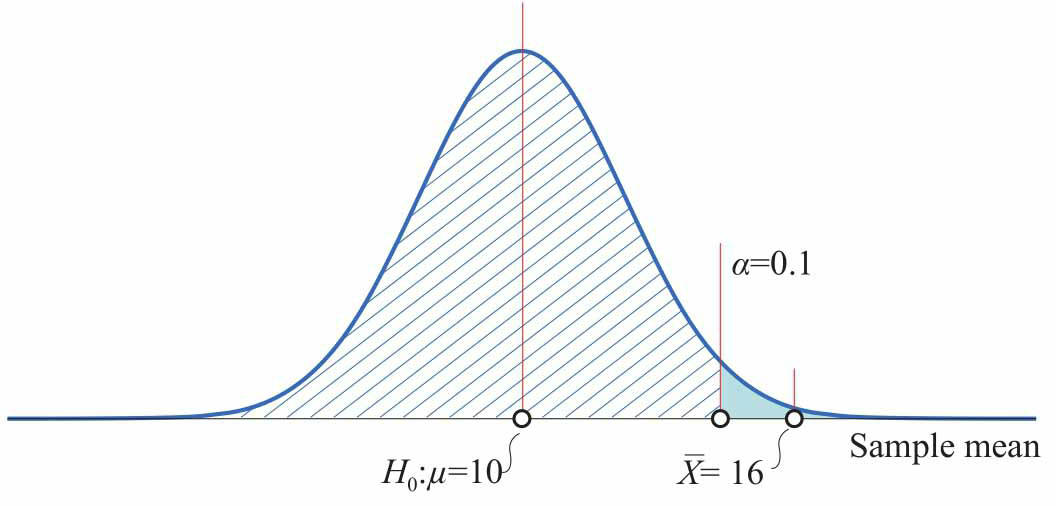  
Not significant 
  
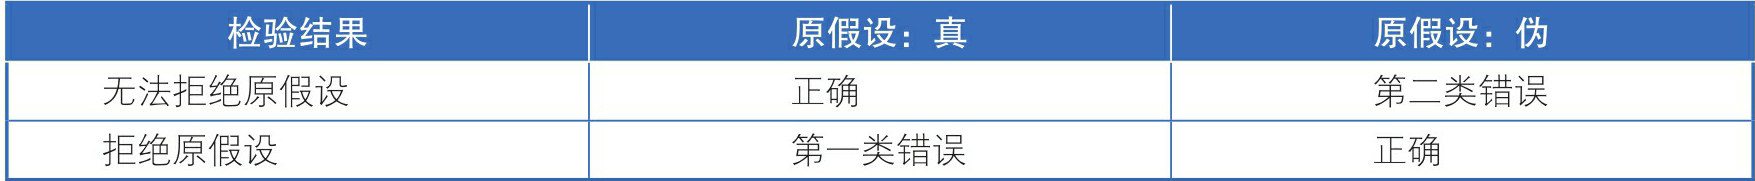
  

In [7]:
from scipy.stats import ttest_ind, t#假設檢定

alpha = 0.05

stockreturn1 = [-0.020809662379123517, 0.00846703325245679, -0.000447501087096569, 0.0037943429167992537, 0.00337077454971646, 0.0006366568709006426, -0.001967167012908333, -0.003026737458921125, 0.0040596182036833905, 0.0024232318939352293, 0.0011785909968373698, 0.0012210301746806707, -0.004508716349038044, 0.0008052363515955729, 0.006508926423269834]

stockreturn2 = [-0.001844371674326828, -0.002070621212762691, 0.01316396325231195, 0.0014103778581735504, 9.433813027959204e-05, 0.005497221072897629, 0.003311408623482226, 6.701621195870366e-05, -0.0037197388299609058, 0.00022932086310833988, -0.0011259319781000698, 0.0016769041143169794, -0.0008123268983916132, 0.0007101444324377759, -0.00043462154134144004]

# calculate cirtical value
df = len(stockreturn1)+len(stockreturn2)-2
critical_value = t.ppf(1.0-alpha, df)
print('critical_value=%.3f' % (critical_value))

# calculate t stastics and p value
t_stat, p = ttest_ind(stockreturn1, stockreturn2)
print('t-statistic=%.3f, p_value=%.3f' % (t_stat, p))

# conclusion via t statastics
if abs(t_stat) <= critical_value:
    print('Cannot reject Null Hypothesis -- The mean of these two samples are the same.')
else:
    print('Reject Null Hypothesis -- The mean of these two samples are different.')
    
# conclusion via p value
if p <= alpha:
    print('Reject Null Hypothesis -- The mean of these two samples are different.')
else:
    print('Cannot reject Null Hypothesis -- The mean of these two samples are the same.')


critical_value=1.701
t-statistic=-0.476, p_value=0.638
Cannot reject Null Hypothesis -- The mean of these two samples are the same.
Cannot reject Null Hypothesis -- The mean of these two samples are the same.


當統計量>z 犯type 1的機率就是alpha  
當統計量<z 犯type 2(沒拒絕錯誤的h0)  
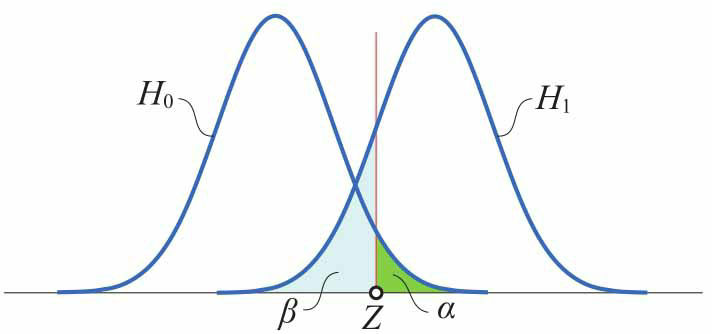

In [10]:
from scipy import stats#p值

alpha = 0.05

p_value = stats.binom_test(14, n=20, p=0.5, alternative='greater')
print('p_value=%.3f' % p_value)

if p_value <= alpha:
    print('Reject Null Hypothesis -- Unfair coin')
else:
    print('Cannot reject Null Hypothesis -- Fair coin')


p_value=0.058
Cannot reject Null Hypothesis -- Fair coin
